In [73]:
# Busqueda por costo.

# Creamos la clase Nodo
import matplotlib.pyplot as plt
from networkx import nx
G=nx.Graph()
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
    #Definimos una funcion para obtener el costo - CompareTo (Java)
  

['Cuenca', 'Quito', 'Latacunga', 'Ambato', 'Puyo']
Costo total: 440


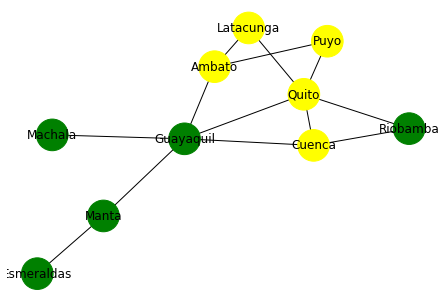

In [74]:
def Compare(node):
    return node.cost
# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba':190, 'Quito':280, 'Guayaquil':170},
        'Latacunga': {'Ambato':50, 'Quito':30},
        'Esmeraldas': {'Manta':80},
        'Manta': {'Guayaquil':60},
        'Quito': {'Riobamba':110, 'Latacunga':30, 'Cuenca':280, 'Guayaquil':190, 'Puyo':170},
        'Riobamba': {'Cuenca':190, 'Quito':110},
        'Ambato': {'Latacunga':50, 'Puyo':80, 'Guayaquil':230},
        'Puyo': {'Ambato':60, 'Quito':170},
        'Machala': {'Guayaquil':80},
        'Guayaquil': {'Machala':80, 'Ambato':230, 'Quito':190, 'Cuenca':170, 'Manta':60}
    }

    init_state = 'Cuenca'
    solution = 'Puyo'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")
        
        
    G.add_nodes_from(connections.keys())
    
    color_map = [] 
    keys= connections.keys()
    for r in keys:
        
        if r in result:
           
            color_map.append('yellow')
            
                       
        else:
            
            color_map.append('green')

      
    for nodo, v in connections.items():
       
        G.add_edges_from(([(nodo,t) for t in v]))
    
    
    #edges=nx.draw_networkx_edges(G,pos=)
    
    nx.draw(G,node_color=color_map, with_labels=True,  node_size=1000)

    plt.show()


# BÚSQUEDA POR COSTO SISTEMA JUDICIAL

Se ha usado google maps para ubicar el punto de partido, y se ha localizado todos los departamentos relacionados
con la policia nacional.

en la siguiente imagen se puede observar la cantidad de nodos y niveles del grafo

$n = \frac{{(b^{d+1} -1 })}{(b-1)}$ 
$Donde$ \
$d=6$ \
$n=20$ 

$fr= \frac{20}{6} = 3.33$


## Complejidad Temporal


$O=b^{n}$ \
$Donde$ \
$b=3.33$ \
$n=20$ \
$ O = 3.33^{20} =28,111,542,100.17$


## Complejidad espacial

$O= b*n$ \
$Donde$ \
$b=3.33$ \
$n=20$ 

$O= 3.33*20 = 66.6 $ 




In [76]:
# Busqueda por costo.

# Creamos la clase Nodo
import matplotlib.pyplot as plt
from networkx import nx
G=nx.Graph()
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
    #Definimos una funcion para obtener el costo - CompareTo (Java)
  

In [77]:
def Compare(node):
    return node.cost

['UPC Ricaurte', 'Policia Comunitaria', 'UPC El Paraiso', 'Cooperativa Policia Nacional', 'Policia Narcóticos', 'Centro salud policial']
Costo total: 17.7


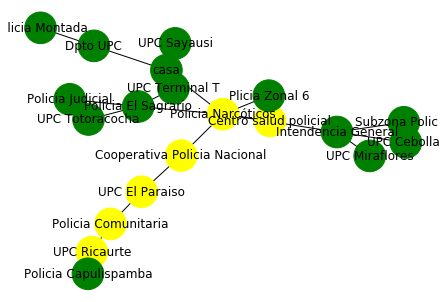

In [85]:

# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'casa' : { 'UPC Sayausi' : 3.9, 'Policia Narcóticos' : 6.6, 'Dpto UPC' :5.5},
            'UPC Sayausi': {'casa' :3.9},
            'Policia Narcóticos':{'casa': 6.6, 'Centro salud policial':2.5, 'Cooperativa Policia Nacional': 4, 'Intendencia General': 4.9, 'Policia El Sagrario':4.9, 'Plicia Zonal 6':4},
            'Centro salud policial':{'Policia Narcóticos':2.5},
            'Cooperativa Policia Nacional':{'Policia Narcóticos':4, 'UPC El Paraiso':2.3},
                'UPC El Paraiso':{'Cooperativa Policia Nacional':2.3, 'Policia Comunitaria':1.2},
                    'Policia Comunitaria':{'UPC El Paraiso':1.2, 'UPC Ricaurte':7.7},
                        'UPC Ricaurte':{'Policia Comunitaria':7.7, 'Policia Capulispamba':6.4},
                            'Policia Capulispamba':{'UPC Ricaurte':6.4},
            'Intendencia General':{'Policia Narcóticos':4.9, 'UPC Cebollar':5.2, 'Subzona Policial': 1.7,'UPC Miraflores':2.8},
            'Subzona Policial':{'Intendencia General':1.6},
                'UPC Cebollar':{'Intendencia General':4.2},
                'UPC Miraflores':{'Intendencia General':2.8},
            'Policia El Sagrario':{'Policia Narcóticos':4.9, 'UPC Totoracocha':2.4, 'UPC Terminal T':1.6, 'Policia Judicial': 1.9},
                'UPC Terminal T':{'Policia El Sagrario':1.6},
                'UPC Totoracocha':{'Policia El Sagrario':2.4},
                'Policia Judicial':{'Policia El Sagrario':1.9},
            'Plicia Zonal 6':{'Policia Narcóticos':4},
        'Dpto UPC':{'casa':5.5,'Policia Montada':2.5},
           'Policia Montada':{'Dpto UPC':2.5}
        
    }

    init_state = 'UPC Ricaurte'
    solution = 'Centro salud policial'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")
        
    G.add_nodes_from(connections.keys())
    color_map = [] 
    keys= connections.keys()
    for r in keys:
        
        if r in result:
           
            color_map.append('yellow')
            
                       
        else:
            
            color_map.append('green')

      
    for nodo, v in connections.items():
       
        G.add_edges_from(([(nodo,t) for t in v]))
    
    
    #edges=nx.draw_networkx_edges(G,pos=)
    
    nx.draw(G,node_color=color_map, with_labels=True,  node_size=1000, edges_weight=10000)

    plt.show()
        
